In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,TensorBoard
from keras import layers
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [2]:
ben_train = os.listdir('C:/Users/hasan/Skin disease Classification FYP/CancerDataset/train/benign')
mal_train = os.listdir('C:/Users/hasan/Skin disease Classification FYP/CancerDataset/train/malignant')

In [3]:
train = []
train_y = []

# For loop to access images from folder and convert then to appropriate format , in this case size and colour were considered , open cv is easiest tool to use for this task 
for i in ben_train:
    x = 'C:/Users/hasan/Skin disease Classification FYP/CancerDataset/train/benign/' + i
    img = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(200,200))
    img = img/255 # normalising image 
    train.append(img.flatten())
    train_y.append(0) # label 0 for benign
for i in mal_train:
    x = 'C:/Users/hasan/Skin disease Classification FYP/CancerDataset/train/malignant/' + i
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img  = cv2.resize(img,(200,200))
    img = img/255 # normalising image
    train.append(img.flatten())
    train_y.append(1) # label 1 for malignant
train = np.array(train) 

In [4]:
train,val,train_y,val_y = train_test_split(train,train_y,test_size=0.2,random_state=44)
train = train.reshape(train.shape[0],200,200,3)
val = val.reshape(val.shape[0],200,200,3)
encoder = LabelEncoder() # transform the labels so they can be read by the machine easily 
encoder = encoder.fit(train_y) # pass through the y labels 
train_y = encoder.transform(train_y) # transfrom the labels 
encoder = encoder.fit(val_y)
val_y = encoder.transform(val_y)
print(str('training rows ' + str(len(train)))) # print the length of training data 
print(str('validation rows ' + str(len(val)))) # validation or test data 

training rows 2109
validation rows 528


In [5]:
## build the model 
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(200 ,200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Adding a second convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
# Second pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Adding a third convolutional layer with 128 filters
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
# Third pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Flattening
model.add(layers.Flatten())
# Full connection
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
model.compile(Adam(0.0001),'binary_crossentropy',['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=2, factor=0.3, min_lr=0.000001)
early_stop = EarlyStopping(patience=4,restore_best_weights=True)
tensorboard = TensorBoard(log_dir='logs')


In [7]:
history = model.fit(train,train_y,epochs=10,batch_size=10,validation_data=(val,val_y),verbose=2,callbacks=[early_stop,reduce_lr,tensorboard])

Epoch 1/10
211/211 - 170s - loss: 0.5988 - accuracy: 0.6638 - val_loss: 0.5346 - val_accuracy: 0.7348 - lr: 1.0000e-04 - 170s/epoch - 804ms/step
Epoch 2/10
211/211 - 161s - loss: 0.4476 - accuracy: 0.7715 - val_loss: 0.4489 - val_accuracy: 0.7652 - lr: 1.0000e-04 - 161s/epoch - 765ms/step
Epoch 3/10
211/211 - 173s - loss: 0.4177 - accuracy: 0.7966 - val_loss: 0.4231 - val_accuracy: 0.7917 - lr: 1.0000e-04 - 173s/epoch - 818ms/step
Epoch 4/10
211/211 - 168s - loss: 0.4007 - accuracy: 0.8018 - val_loss: 0.3850 - val_accuracy: 0.8144 - lr: 1.0000e-04 - 168s/epoch - 798ms/step
Epoch 5/10
211/211 - 165s - loss: 0.3821 - accuracy: 0.8137 - val_loss: 0.4277 - val_accuracy: 0.7784 - lr: 1.0000e-04 - 165s/epoch - 782ms/step
Epoch 6/10

Epoch 6: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
211/211 - 169s - loss: 0.3569 - accuracy: 0.8269 - val_loss: 0.4281 - val_accuracy: 0.7841 - lr: 1.0000e-04 - 169s/epoch - 802ms/step
Epoch 7/10
211/211 - 167s - loss: 0.3296 - accuracy:

In [19]:
%reload_ext tensorboard


In [8]:
epochs=10

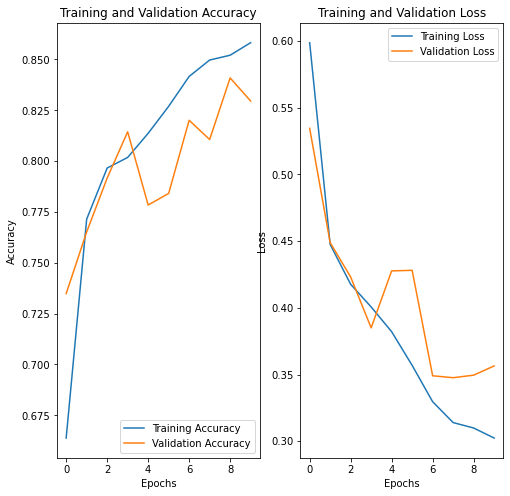

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

17/17 [==============================] - 6s 325ms/step
{'f1': 0.7991071428571428, 'precision': 0.8689320388349514, 'recall': 0.7396694214876033}


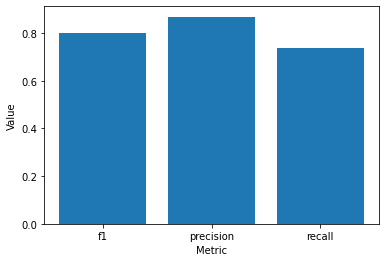

In [10]:

# Make predictions on validation data
val_pred = model.predict(val)
val_pred = np.round(val_pred)
val_pred = val_pred.flatten()

# Calculate metrics
f1 = f1_score(val_y, val_pred)
precision = precision_score(val_y, val_pred)
recall = recall_score(val_y, val_pred)

# Create a dictionary of metrics
metrics = {'f1':f1, 'precision':precision, 'recall':recall}

# Print metrics
print(metrics)

# Plot the metrics in a bar chart
import matplotlib.pyplot as plt

plt.bar(metrics.keys(), metrics.values())
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

In [20]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 144848), started 3 days, 1:51:40 ago. (Use '!kill 144848' to kill it.)

In [11]:
ben_test = os.listdir('C:/Users/hasan/Skin disease Classification FYP/CancerDataset/test/benign')
mal_test = os.listdir('C:/Users/hasan/Skin disease Classification FYP/CancerDataset/test/malignant')

In [12]:
test = []
test_y = []
for i in ben_test:
    x = 'C:/Users/hasan/Skin disease Classification FYP/CancerDataset/test/benign/' + i
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(200,200))
    img = img/255 # normalising 
    test.append(img)
    test_y.append(0)
for i in mal_test:
    x = 'C:/Users/hasan/Skin disease Classification FYP/CancerDataset/test/malignant/' + i
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(200,200))
    img = img/255 # normalising 
    test.append(img)
    test_y.append(1)
test = np.array(test)
encoder = LabelEncoder()
encoder = encoder.fit(test_y)
test_y = encoder.transform(test_y)
loss,acc = model.evaluate(test, test_y,verbose=2)
print('Accuracy on test data: '+ str(acc*100))
print('Loss on test data: ' + str(loss))

21/21 - 6s - loss: 0.3583 - accuracy: 0.8273 - 6s/epoch - 266ms/step
Accuracy on test data: 82.72727131843567
Loss on test data: 0.35833224654197693


In [15]:
acc = 82.72727131843567
loss = 0.35833224654197693

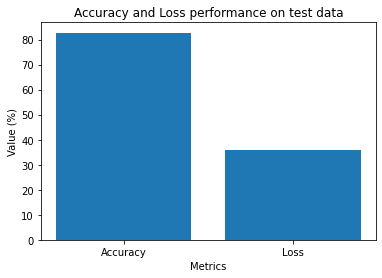

In [23]:
# Create a bar chart
plt.bar(['Accuracy', 'Loss'], [acc, loss*100])

# Add labels to the x and y axis
plt.xlabel('Metrics')
plt.ylabel('Value (%)')
plt.title("Accuracy and Loss performance on test data")

# Show the plot
plt.show()

In [24]:
model.save('model.h5')